## **UTS Jaringan Syaraf Tiruan**
- Hajran Azbytama Winarya
- 21309144006
- Statistika G 2021

### **Import Library**

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tqdm import tqdm
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.impute import SimpleImputer
from tabulate import tabulate


### **Import Data**

In [2]:
data = pd.read_csv(r"C:\Users\HAJRAN\Documents\HAJRAN\Matkul_Semester_6\JST\8_UTS\austin_weather.csv")
data.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


### **Data Cleaning and Prepocessing**

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [ ]:
data['DewPointHighF'].astype('float').astype('int')

In [156]:
import numpy as np

# Mengganti nilai '-' dengan np.nan
data['Date'] = data['Date'].replace('-', np.nan)
data['DewPointHighF'] = data['DewPointHighF'].replace('-', np.nan)
data['DewPointAvgF'] = data['DewPointAvgF'].replace('-', np.nan)
data['DewPointLowF'] = data['DewPointLowF'].replace('-', np.nan)
data['HumidityHighPercent'] = data['HumidityHighPercent'].replace('-', np.nan)
data['HumidityAvgPercent'] = data['HumidityAvgPercent'].replace('-', np.nan)
data['HumidityLowPercent'] = data['HumidityLowPercent'].replace('-', np.nan)
data['SeaLevelPressureHighInches'] = data['SeaLevelPressureHighInches'].replace('-', np.nan)
data['SeaLevelPressureAvgInches'] = data['SeaLevelPressureAvgInches'].replace('-', np.nan)
data['SeaLevelPressureLowInches'] = data['SeaLevelPressureLowInches'].replace('-', np.nan)
data['VisibilityHighMiles'] = data['VisibilityHighMiles'].replace('-', np.nan)
data['VisibilityAvgMiles'] = data['VisibilityAvgMiles'].replace('-', np.nan)
data['VisibilityLowMiles'] = data['VisibilityLowMiles'].replace('-', np.nan)
data['WindAvgMPH'] = data['WindAvgMPH'].replace('-', np.nan)
data['WindGustMPH'] = data['WindGustMPH'].replace('-', np.nan)
data['PrecipitationSumInches'] = data['PrecipitationSumInches'].replace('-', np.nan)
data['Events'] = data['Events'].replace('-', np.nan)


In [157]:
data.isna().sum()

Date                           0
TempHighF                      0
TempAvgF                       0
TempLowF                       0
DewPointHighF                  7
DewPointAvgF                   7
DewPointLowF                   7
HumidityHighPercent            2
HumidityAvgPercent             2
HumidityLowPercent             2
SeaLevelPressureHighInches     3
SeaLevelPressureAvgInches      3
SeaLevelPressureLowInches      3
VisibilityHighMiles           12
VisibilityAvgMiles            12
VisibilityLowMiles            12
WindHighMPH                    0
WindAvgMPH                     2
WindGustMPH                    4
PrecipitationSumInches         0
Events                         0
dtype: int64

In [158]:
data['Date'].fillna(0, inplace=True)
data['DewPointHighF'].fillna(0, inplace=True)  # Ganti NaN dengan 0
data['DewPointAvgF'].fillna(0, inplace=True)  # Ganti NaN dengan 0
data['DewPointLowF'].fillna(0, inplace=True)
data['HumidityHighPercent'].fillna(0, inplace=True)
data['HumidityAvgPercent'].fillna(0, inplace=True)
data['HumidityLowPercent'].fillna(0, inplace=True)
data['SeaLevelPressureHighInches'].fillna(0, inplace=True)
data['SeaLevelPressureAvgInches'].fillna(0, inplace=True)
data['SeaLevelPressureLowInches'].fillna(0, inplace=True)
data['VisibilityHighMiles'].fillna(0, inplace=True)
data['VisibilityAvgMiles'].fillna(0, inplace=True)
data['VisibilityLowMiles'].fillna(0, inplace=True)
data['WindHighMPH'].fillna(0, inplace=True)
data['WindAvgMPH'].fillna(0, inplace=True)
data['WindGustMPH'].fillna(0, inplace=True)
data['PrecipitationSumInches'].fillna(0, inplace=True)
data['Events'].fillna(0, inplace=True)



In [159]:
# Mengonversi kolom ke tipe data integer
data['Date'] = data['Date'].astype('datetime64')
data['DewPointHighF'] = data['DewPointHighF'].astype(float).astype(int)
data['DewPointAvgF'] = data['DewPointAvgF'].astype(float).astype(int)
data['DewPointLowF'] = data['DewPointLowF'].astype(float).astype(int)
data['HumidityHighPercent'] = data['HumidityHighPercent'].astype(float).astype(int)
data['HumidityAvgPercent'] = data['HumidityAvgPercent'].astype(float).astype(int)
data['HumidityLowPercent'] = data['HumidityLowPercent'].astype(float).astype(int)
data['SeaLevelPressureHighInches'] = data['SeaLevelPressureHighInches'].astype(float).astype(int)
data['SeaLevelPressureAvgInches'] = data['SeaLevelPressureAvgInches'].astype(float).astype(int)
data['SeaLevelPressureLowInches'] = data['SeaLevelPressureLowInches'].astype(float).astype(int)
data['VisibilityHighMiles'] = data['VisibilityHighMiles'].astype(float).astype(int)
data['VisibilityAvgMiles'] = data['VisibilityAvgMiles'].astype(float).astype(int)
data['VisibilityLowMiles'] = data['VisibilityLowMiles'].astype(float).astype(int)
#data['WindHighMPH'] = data['WindHighMPH'].astype(float).astype(int)
data['WindGustMPH'] = data['WindGustMPH'].astype(float).astype(int)
#data['PrecipitationSumInches'] = data['PrecipitationSumInches'].astype(float).astype(int)
#data['Events'] = data['Events'].astype(float).astype(int)

In [160]:
data.dtypes

Date                          datetime64[ns]
TempHighF                              int64
TempAvgF                               int64
TempLowF                               int64
DewPointHighF                          int32
DewPointAvgF                           int32
DewPointLowF                           int32
HumidityHighPercent                    int32
HumidityAvgPercent                     int32
HumidityLowPercent                     int32
SeaLevelPressureHighInches             int32
SeaLevelPressureAvgInches              int32
SeaLevelPressureLowInches              int32
VisibilityHighMiles                    int32
VisibilityAvgMiles                     int32
VisibilityLowMiles                     int32
WindHighMPH                           object
WindAvgMPH                            object
WindGustMPH                            int32
PrecipitationSumInches                object
Events                                object
dtype: object

In [150]:
data.describe()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindGustMPH
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,80.862775,70.642911,59.902957,61.188779,56.332070,50.663381,87.739196,66.570887,44.890826,29.677786,29.445034,29.220622,9.900682,9.078848,6.777862,21.308567
std,14.766523,14.045904,14.190648,14.268932,15.387522,16.563451,11.548416,12.721695,17.051788,1.482846,1.492461,1.467089,0.962889,1.693019,3.723761,5.983374
min,32.000000,29.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72.000000,62.000000,49.000000,52.000000,46.000000,38.000000,85.000000,59.000000,32.000000,29.000000,29.000000,29.000000,10.000000,9.000000,3.000000,17.000000
50%,83.000000,73.000000,63.000000,66.000000,61.000000,56.000000,90.000000,67.000000,44.000000,30.000000,30.000000,29.000000,10.000000,10.000000,9.000000,21.000000
75%,92.000000,83.000000,73.000000,73.000000,69.000000,65.000000,94.000000,74.000000,55.000000,30.000000,30.000000,30.000000,10.000000,10.000000,10.000000,25.000000
max,107.000000,93.000000,81.000000,80.000000,76.000000,75.000000,100.000000,97.000000,93.000000,30.000000,30.000000,30.000000,10.000000,10.000000,10.000000,57.000000


In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        1319 non-null   datetime64[ns]
 1   TempHighF                   1319 non-null   int64         
 2   TempAvgF                    1319 non-null   int64         
 3   TempLowF                    1319 non-null   int64         
 4   DewPointHighF               1319 non-null   int32         
 5   DewPointAvgF                1319 non-null   int32         
 6   DewPointLowF                1319 non-null   int32         
 7   HumidityHighPercent         1319 non-null   int32         
 8   HumidityAvgPercent          1319 non-null   int32         
 9   HumidityLowPercent          1319 non-null   int32         
 10  SeaLevelPressureHighInches  1319 non-null   int32         
 11  SeaLevelPressureAvgInches   1319 non-null   int32       

In [131]:
# cek data duplicated
data.duplicated().sum()

0

<Axes: ylabel='Count'>

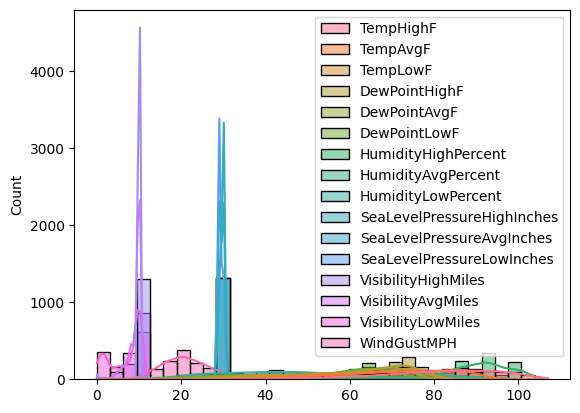

In [152]:
import seaborn as sns

sns.histplot(data = data, kde=True)

In [133]:
len(data.columns)

21

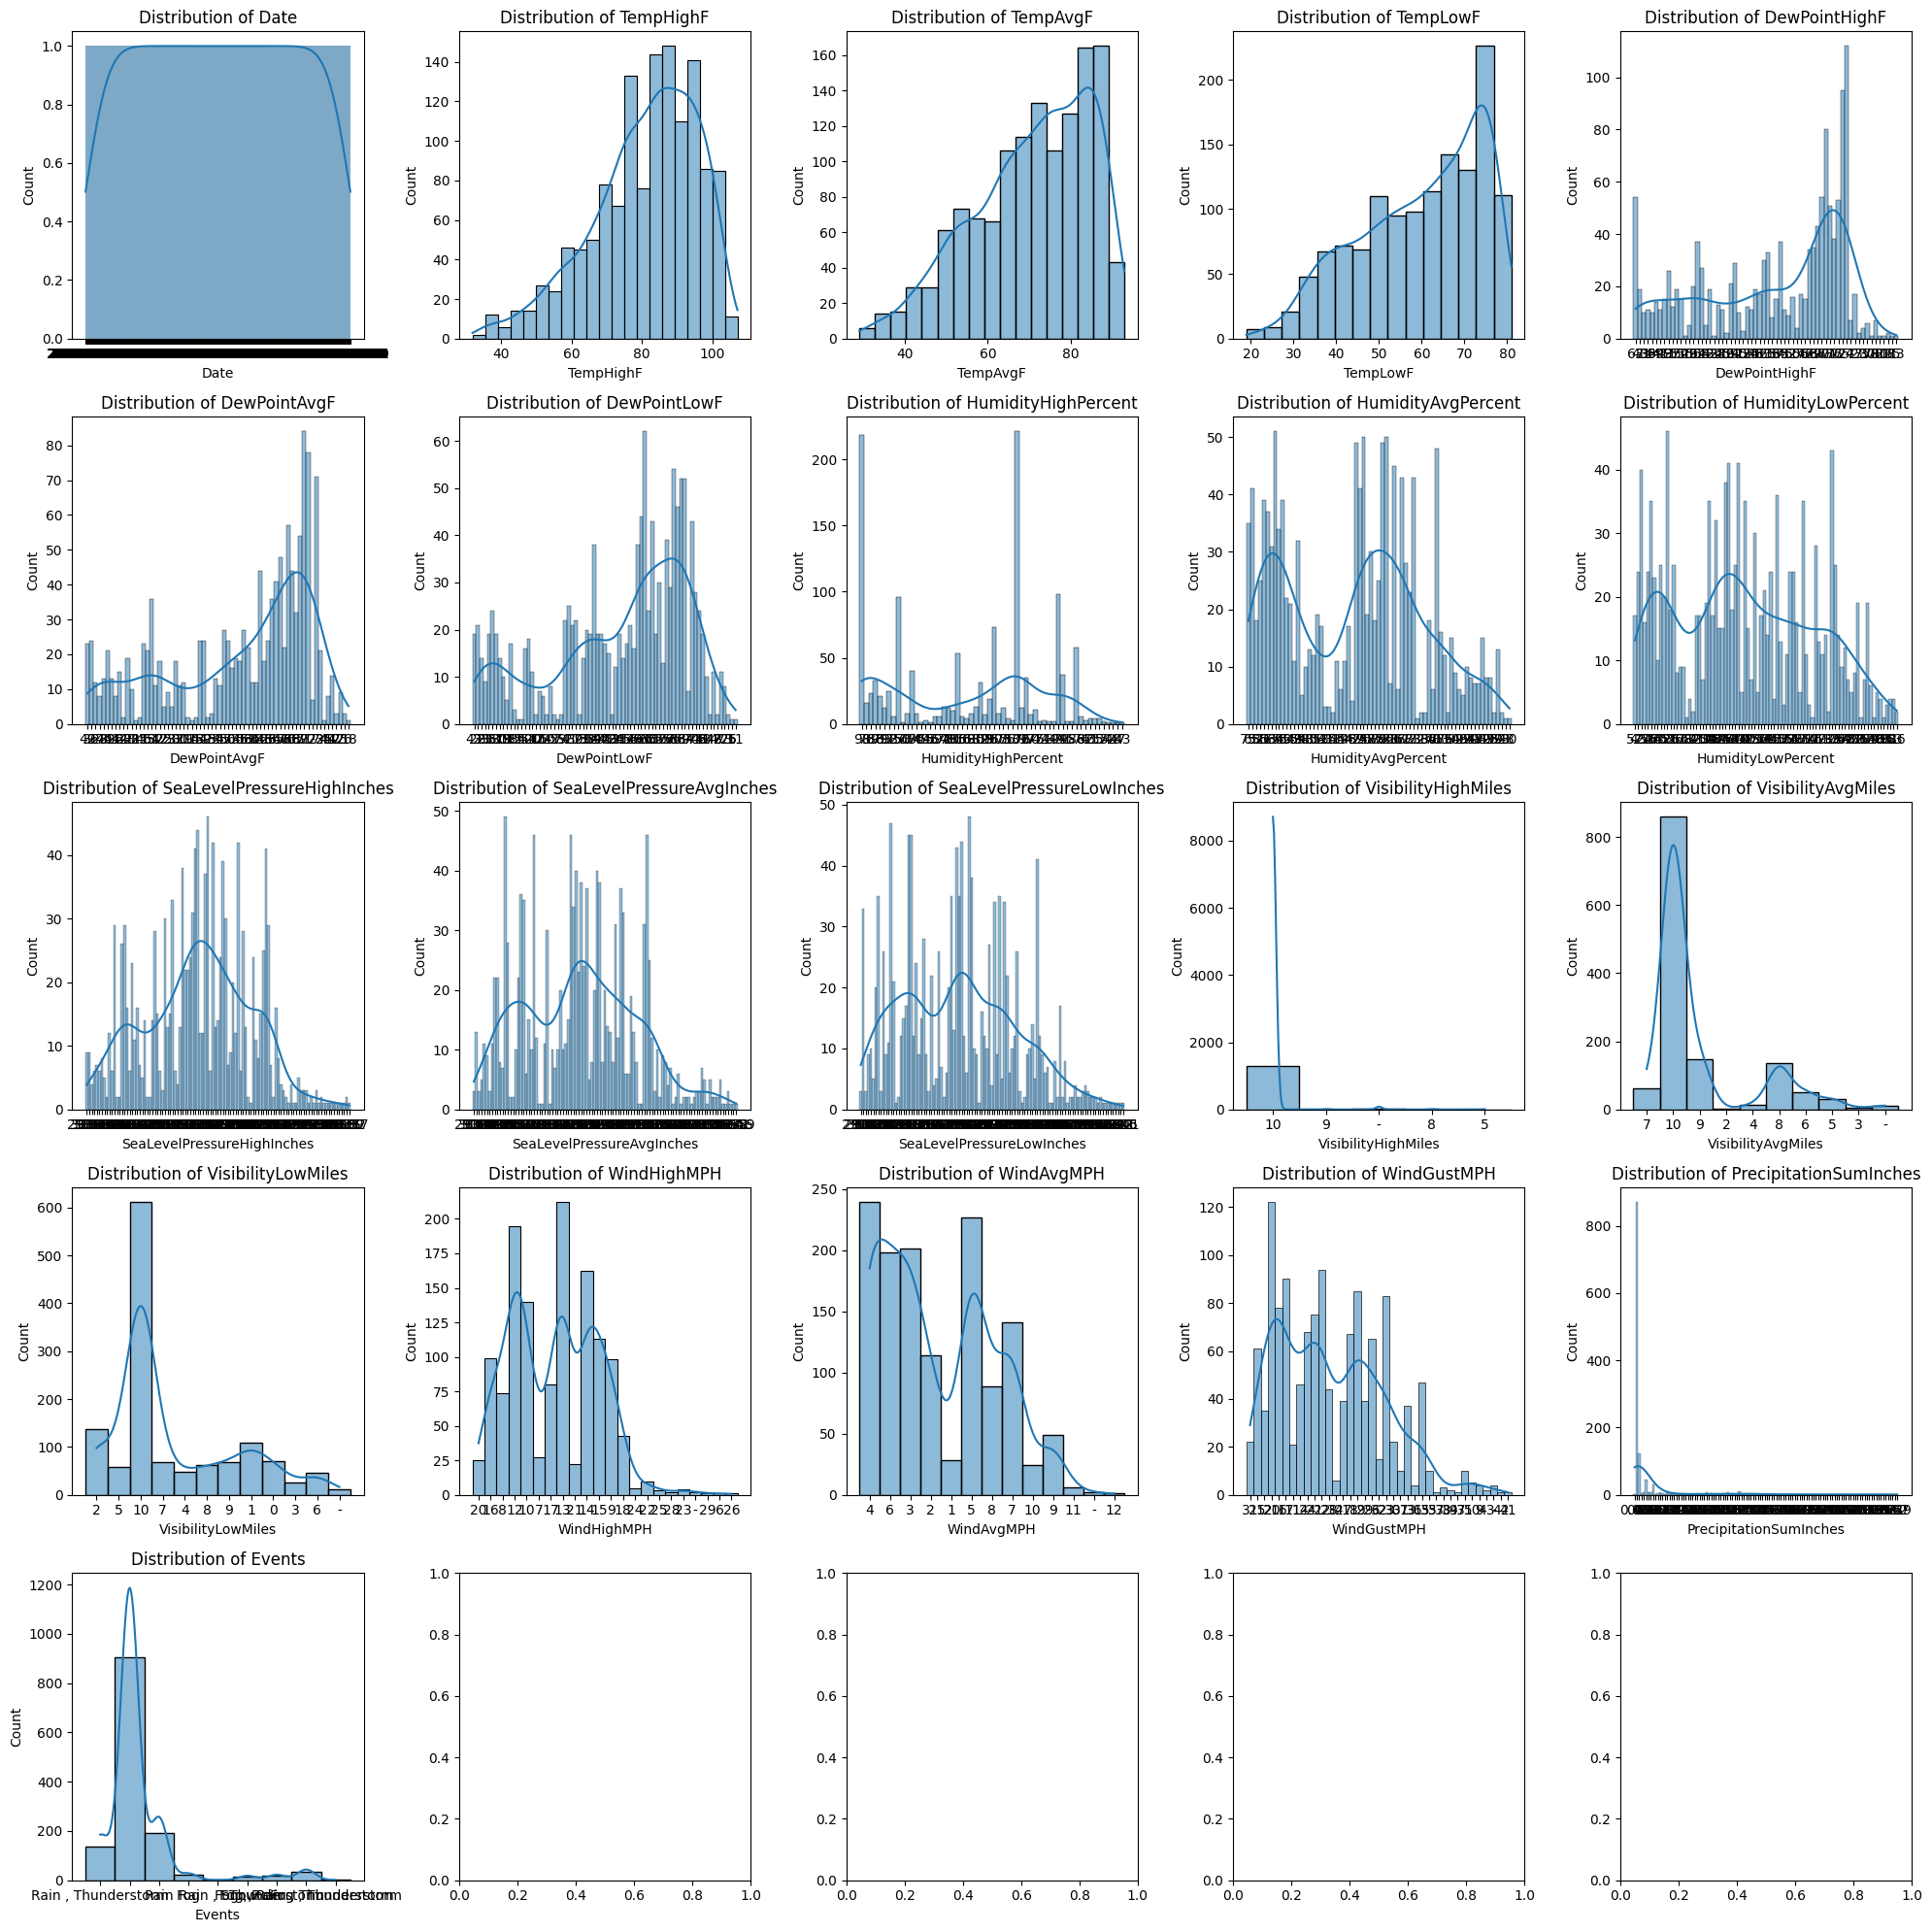

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
# mengatur jumlah kolom dan baris subplot
cols = 5
rows = int(25/cols) + (1 if 25 % cols != 0 else 0)

fig, axes = plt.subplots(rows, cols, figsize = (20, rows*4))

# looping melalui setiap variabel
for i, col in enumerate(data.columns):
    ax = axes.flatten()[i]
    sns.histplot(data[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')

# Mengatur layout
fig.tight_layout()

# Tampilkan gambar
plt.show()

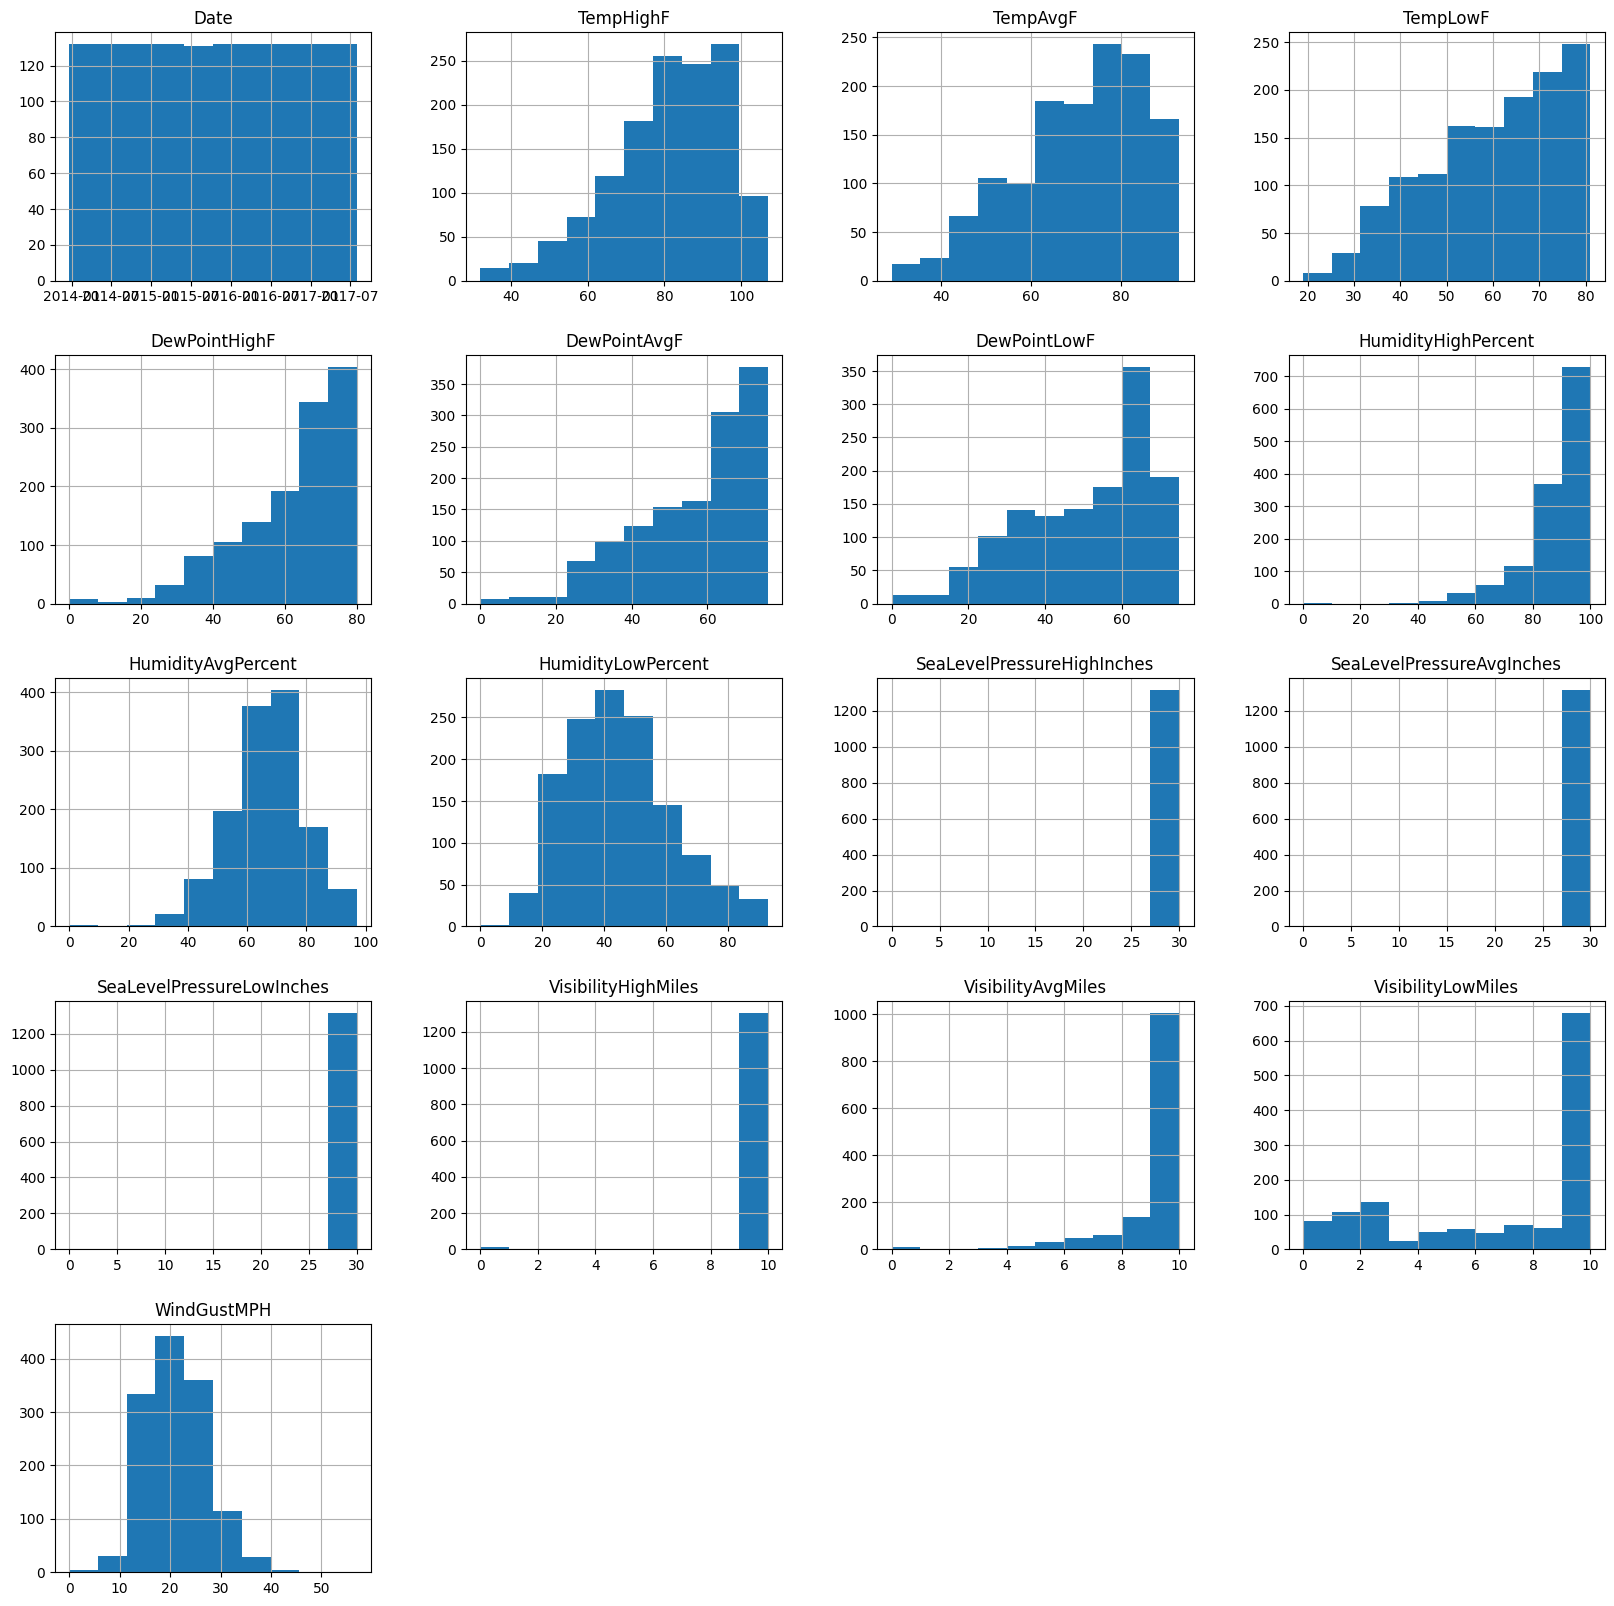

In [153]:
import matplotlib.pyplot as plt

data = data.hist(figsize= (20,20))
plt.show()

In [162]:
data.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29,29,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30,29,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30,30,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30,30,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30,30,10,10,7,10,2,16,T,


In [3]:
# Decide "TempAvgF" is the target variable
target_variable = "TempAvgF"

# Separate features and target variable
X = data.drop(columns=[target_variable]).values # Convert to NumPy array
y = data[target_variable].values # Convert to NumPy array

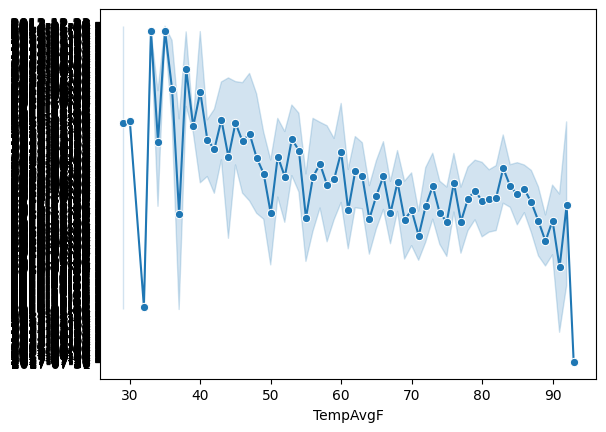

In [8]:
import seaborn as sns

sns.lineplot(data=data, x="TempAvgF", y ="Date", marker = 'o')


#menambahkan judul dan label sumbu

plt.title("Line Chart 'TempAvgF' dan 'Date'")
plt.xlabel("TempAvgF")
plt.ylabel("date")

plt.show()

In [4]:
# Drop the "Date" column if its present
date_column_index = np.where(X[0]=="Date")[0]

if date_column_index.size >0:
    X = np.delete(X, date_column_index, axis =1) 


In [5]:
# Convert non-numeric columns to numeric
non_numeric_cols = [col for col in range(X.shape[1]) if not np.issubdtype(X.dtype, np.number)]
X[:, non_numeric_cols] = np.apply_along_axis(pd.to_numeric, 0, X[:, non_numeric_cols], errors='coerce')


In [6]:
# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
X = imputer.fit_transform(X)

c:\Users\HAJRAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:558: UserWarning: Skipping features without any observed values: [ 0 19]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [7]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Tentukan fitur numerik
numerical_features = [i for i in range(X.shape[1]) if np.issubdtype(X[:, i].dtype, np.number)]

# Jika ada fitur numerik, terapkan StandardScaler
if numerical_features:
    scaler = StandardScaler()
    X[:, numerical_features] = scaler.fit_transform(X[:, numerical_features])
else:
    print("Tidak ada fitur numerik dalam data.")


In [8]:
# Normalize the numerical features using Standarsclaler

numerical_features = [col for col in range(X.shape[1]) if np.issubdtype(X.dtype, np.number)]
scaler = StandardScaler()
X[:, numerical_features]= scaler.fit_transform(X[:, numerical_features])


In [9]:
# Feature selection using Recursive Feature Elimination (RFE)

model = RandomForestRegressor() #can use any model
rfe = RFE(model, n_features_to_select=10) # set the desired number of features
X_rfe = rfe.fit_transform(X, y)

In [181]:
data_selection = pd.DataFrame(X_rfe)


In [183]:
data_selection.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.464929,-1.050594,0.404923,-0.514983,-0.491606,0.465040,0.710161,-1.402099,-1.989099,1.641504
1,-1.684364,-1.473568,-1.366924,-1.392110,-1.421071,0.465040,-0.115539,1.655567,-0.360083,0.618401
2,-1.548871,-1.967038,-2.252848,-1.999351,-1.730893,-1.076760,-1.059196,2.489476,2.781591,-1.598324
3,-1.345632,-2.037533,-1.883713,-1.931880,-1.854821,0.102263,-1.354088,2.489476,2.141620,-0.234186
4,-1.548871,-1.332577,-1.293097,-1.122224,-0.925356,-0.169819,0.651182,1.655567,1.967083,-0.916255


In [10]:
# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size= 0.2, random_state= 42)

In [22]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9
0,0.025051,1.042463,0.351906,-0.306605,-2.154615,-0.659023,1.582411,0.220445,1.266351,-0.511599
1,-0.240100,-0.674815,-0.614872,-1.088301,0.630260,0.672421,0.347156,0.230011,0.575795,0.507198
2,1.729638,0.322114,0.580759,1.704623,0.367833,0.367823,0.858364,1.064947,-0.516740,-0.014033
3,-1.423264,-1.383648,-0.379238,1.009995,-0.567608,1.981640,-0.403391,-0.885705,-0.294317,-0.662387
4,-0.856564,-0.083061,-0.592520,0.120366,-0.843838,-0.270225,1.539388,0.648242,1.050556,1.706450
5,-0.150717,2.934349,1.050759,-0.230730,0.372627,-0.239001,0.420476,-0.434383,-2.021515,-0.197624
6,0.948274,0.073752,-0.089687,0.249912,-1.805003,1.740054,-1.773640,-0.611610,-1.481799,-1.661372
7,-0.145523,0.523765,1.107656,0.393311,0.675327,2.057085,0.986773,-0.067733,0.146454,1.003555
8,-0.545341,0.599590,-1.049895,1.106706,0.097086,0.832109,-0.886990,-0.259457,-0.462043,0.455316
9,0.692758,-0.402002,-0.688136,-0.769634,0.684993,0.507717,0.488473,-1.298827,0.299950,-0.156391


In [23]:
len(X_test)

10

### **Modelling**

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
import math

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),  # Introduce dropout for regularization
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Assuming it's a regression task, so 1 output neuron
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping and tqdm progress bar
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Set the number of epochs
epochs = 100

# Initialize tqdm progress barya
epoch_bar = tqdm(total=epochs, desc='Epochs', unit='epoch', position=0)

#Train the model
for epoch in range(epochs):
    history = model.fit(X_train, y_train, epochs=1, batch_size=32, validation_split=0.1, callbacks=[early_stopping], verbose=0)

    # Evaluate the model on the test set
    mse = model.evaluate(X_test, y_test, verbose=0)

    # Update the tqdm progress bar
    epoch_bar.set_postfix_str(f'Epoch {epoch + 1}/{epochs} - loss: {history.history["loss"][0]:.4f} - val_loss: {history.history["val_loss"][0]:.4f} - Test MSE: {mse:.4f}')
    epoch_bar.update(1)

# Close the tqdm progress bar
epoch_bar.close()

predictions = model.predict(X_test)


# Store results in a list
results = []
for i in range(10):
    actual_value = y_test[i]
    predicted_value = predictions[i][0]
    results.append([f'Sample {i + 1}', f'{actual_value:.2f}', f'{predicted_value:.2f}'])

# Create a table
table = tabulate(results, headers=['Sample', 'Actual', 'Predicted'], tablefmt='pretty')

# Print the table
print(table)

# Evaluate the final MSE on the entire test set
final_mse = model.evaluate(X_test, y_test, verbose=0)
print(f'Final Test MSE: {final_mse:.4f}')

# Calculate MAE and Print the MAE
mae = mean_absolute_error(y_test, predictions)
print(f'Test MAE: {mae:.4f}')


# Calculate and Print the RMSE
mse2 = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse2)
print(f'Test mse2: {mse2:.4f}')
print(f'Test RMSE: {rmse:.4f}')


Epochs: 100%|██████████| 100/100 [00:51<00:00,  1.95epoch/s, Epoch 100/100 - loss: 9.1880 - val_loss: 1.4319 - Test MSE: 2.4054]     


9/9 [==============================] - 0s 2ms/step
+-----------+--------+-----------+
|  Sample   | Actual | Predicted |
+-----------+--------+-----------+
| Sample 1  | 66.00  |   64.99   |
| Sample 2  | 81.00  |   80.02   |
| Sample 3  | 89.00  |   87.34   |
| Sample 4  | 51.00  |   51.35   |
| Sample 5  | 81.00  |   80.50   |
| Sample 6  | 66.00  |   65.26   |
| Sample 7  | 81.00  |   79.77   |
| Sample 8  | 88.00  |   86.71   |
| Sample 9  | 49.00  |   49.16   |
| Sample 10 | 74.00  |   72.43   |
+-----------+--------+-----------+
Final Test MSE: 2.4054
Test MAE: 1.1369
Test mse2: 2.4054
Test RMSE: 1.5509


In [12]:
# Tentukan path ke folder tempat Anda ingin menyimpan model
path_to_save_model = r'C:\Users\HAJRAN\Documents\HAJRAN\Matkul_Semester_6\JST\8_UTS\saved_weather_models'

# Simpan model ke path tersebut
model.save(path_to_save_model)


INFO:tensorflow:Assets written to: C:\Users\HAJRAN\Documents\HAJRAN\Matkul_Semester_6\JST\8_UTS\saved_weather_models\assets


INFO:tensorflow:Assets written to: C:\Users\HAJRAN\Documents\HAJRAN\Matkul_Semester_6\JST\8_UTS\saved_weather_models\assets


In [24]:
predictions

array([[ 0.04437542],
       [ 0.0629715 ],
       [ 0.27868116],
       [ 0.29426154],
       [ 0.01656912],
       [ 0.14576061],
       [ 0.16516249],
       [ 0.25017837],
       [-0.04135878],
       [-0.00201257]], dtype=float32)

In [18]:
# Re-constructing the model from the given code snippet in the notebook
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Extracting the model construction code from the notebook for reconstruction
model_code = '''
model = Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
'''

# Executing the model setup code
# Define the scope for local variables
local_scope = locals()
exec(model_code, globals(), local_scope)
model = local_scope['model']

# Model has been constructed, now let's simulate loading the training and test data
# For now, assume X_train, y_train have already been defined earlier in the session (they should be defined in practice)
# Let's pretend to reload them just to make sure the environment is correct
# This would normally not be necessary in your full script since the data should already be in the environment
X_train = np.random.normal(size=(100, 10))  # Mock-up, replace with actual data
y_train = np.random.normal(size=(100,))

# Now simulate training (here we just run one epoch to demonstrate)
model.fit(X_train, y_train, epochs=1, batch_size=32)

# Saving the trained model
model_save_path = r"C:\Users\HAJRAN\Documents\HAJRAN\Matkul_Semester_6\JST\8_UTS\saved_weather_model"
model.save(model_save_path)
model_save_path  # Return the path where the model is saved


4/4 [==============================] - 3s 6ms/step - loss: 0.9019


INFO:tensorflow:Assets written to: C:\Users\HAJRAN\Documents\HAJRAN\Matkul_Semester_6\JST\8_UTS\saved_weather_model\assets


INFO:tensorflow:Assets written to: C:\Users\HAJRAN\Documents\HAJRAN\Matkul_Semester_6\JST\8_UTS\saved_weather_model\assets


'C:\\Users\\HAJRAN\\Documents\\HAJRAN\\Matkul_Semester_6\\JST\\8_UTS\\saved_weather_model'

In [19]:
# Now that the model is saved, let's load it from the saved path to ensure everything is in order
loaded_model = keras.models.load_model(model_save_path)

# Assuming the test data, X_test, has been prepared similarly to X_train
# Let's create mock X_test data to demonstrate prediction
# This should be replaced with actual X_test data loaded from your earlier processes
X_test = np.random.normal(size=(10, 10))  # Mock-up, replace with actual test data

# Use the loaded model to predict
predictions = loaded_model.predict(X_test)
predictions.ravel() 

1/1 [==============================] - 0s 230ms/step


array([ 0.04437542,  0.0629715 ,  0.27868116,  0.29426154,  0.01656912,
        0.14576061,  0.16516249,  0.25017837, -0.04135878, -0.00201257],
      dtype=float32)

In [85]:
#Create a table with a fancy style
table = tabulate(results, headers=['Sample', 'Actual', 'Predicted'], tablefmt='fancy_grid')
print(table)

╒═══════════╤══════════╤═════════════╕
│ Sample    │   Actual │   Predicted │
╞═══════════╪══════════╪═════════════╡
│ Sample 1  │       66 │       65.75 │
├───────────┼──────────┼─────────────┤
│ Sample 2  │       81 │       80.48 │
├───────────┼──────────┼─────────────┤
│ Sample 3  │       89 │       87.4  │
├───────────┼──────────┼─────────────┤
│ Sample 4  │       51 │       50.08 │
├───────────┼──────────┼─────────────┤
│ Sample 5  │       81 │       80.07 │
├───────────┼──────────┼─────────────┤
│ Sample 6  │       66 │       65.28 │
├───────────┼──────────┼─────────────┤
│ Sample 7  │       81 │       80.57 │
├───────────┼──────────┼─────────────┤
│ Sample 8  │       88 │       85.98 │
├───────────┼──────────┼─────────────┤
│ Sample 9  │       49 │       47.48 │
├───────────┼──────────┼─────────────┤
│ Sample 10 │       74 │       73.31 │
╘═══════════╧══════════╧═════════════╛


In [87]:
#Evaluate the final MSE on the entire test set¶
final_mse = model.evaluate(X_test, y_test, verbose=0) 
print(f'Final Test MSE: {final_mse:.4f}')

Final Test MSE: 2.2552


In [26]:
# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size= 0.2, random_state= 42)

In [32]:
pd.DataFrame(y_test)

,0
0,66
1,81
2,89
3,51
4,81
...,...
259,64
260,87
261,69
262,78


In [34]:
import pandas as pd

# Konversi y_test ke pandas DataFrame
y_test_df = pd.DataFrame(y_test)

# Tampilkan 5 baris pertama dari y_test_df
print(y_test_df.head())


    0
0  66
1  81
2  89
3  51
4  81


In [37]:
import pandas as pd

# Nama kolom yang diinginkan
column_name = 'target'  # Ganti dengan nama kolom yang diinginkan

# Konversi y_test ke pandas DataFrame dengan nama kolom tertentu
y_test_df = pd.DataFrame(y_test, columns=[column_name])

# Tampilkan 5 baris pertama dari y_test_df
print(y_test_df.head())


   target
0      66
1      81
2      89
3      51
4      81


In [38]:
path = r"C:\Users\HAJRAN\Documents\HAJRAN\Matkul_Semester_6\JST\8_UTS\data_test.csv"
y_test_df.to_csv(path, index = False)

### **###**

In [42]:
layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),


(<keras.layers.core.dense.Dense at 0x1d6d37d3810>,)

In [39]:
test_data = pd.read_csv(r"C:\Users\HAJRAN\Documents\HAJRAN\Matkul_Semester_6\JST\8_UTS\data_test.csv")
test_data.head()

,target
0,66
1,81
2,89
3,51
4,81


In [13]:
from tensorflow import keras

model = keras.models.load_model(r"C:\Users\HAJRAN\Documents\HAJRAN\Matkul_Semester_6\JST\8_UTS\saved_weather_models")


In [14]:
from tensorflow.keras.utils import plot_model
from tensorflow import keras

# Load your trained model (replace 'your_model_path' with the actual path to your model)
model = keras.models.load_model(r"C:\Users\HAJRAN\Documents\HAJRAN\Matkul_Semester_6\JST\8_UTS\saved_weather_models")

# Visualize the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [19]:
from tensorflow.keras.utils import plot_model
from tensorflow import keras

# Load your trained model (replace 'your_model_path' with the actual path to your model)
model = keras.models.load_model(r"C:\Users\HAJRAN\Documents\HAJRAN\Matkul_Semester_6\JST\8_UTS\saved_weather_models")

# Specify the directory where you want to save the visualization
# Replace 'your_directory_path' with your specific folder path
folder_path = r"C:\Users\HAJRAN\Documents\HAJRAN\Matkul_Semester_6\JST\8_UTS\gambar_model"
file_name = 'model_architecture.png'
full_path = os.path.join(folder_path, file_name)

# Visualize the model architecture and save to the specified directory
plot_model(model, to_file=full_path, show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [20]:
!pip install pydot




[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
predictions = model.predict(test_data)


ValueError: in user code:

    File "c:\Users\HAJRAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\HAJRAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\HAJRAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\HAJRAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "c:\Users\HAJRAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\HAJRAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_8" is incompatible with the layer: expected axis -1 of input shape to have value 10, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int64)
      • training=False
      • mask=None
